In [63]:
import molmap
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from molmap import feature, dataset

In [60]:
data = dataset.load_HIV()

total samples: 41127


In [38]:
aspirin = 'CC(=O)OC1=CC=CC=C1C(O)=O' #aspirin
NAC = 'CC(=O)NC1=CC=CC=C1C(O)=O' #N_acetylanthranilic_acid
smiles_list = [aspirin, NAC]

In [54]:
E = feature.fingerprint.Extraction({'MAP4':{'nBits':64, 'fold_dimensions': 400}})

In [61]:
X = E.batch_transform(data.x)

100%|##########| 41127/41127 [01:17<00:00, 527.65it/s]


In [64]:
dfx = pd.DataFrame(X*1)

In [69]:
mp = molmap.AggMap(dfx)

2020-09-06 12:44:56,538 - INFO - [bidd-molmap] - Calculating distance ...
2020-09-06 12:44:56,551 - INFO - [bidd-molmap] - the number of process is 16


100%|##########| 400/400 [00:00<00:00, 407.47it/s]


In [70]:
mp = mp.fit(cluster_channels=1)

2020-09-06 12:45:22,546 - INFO - [bidd-molmap] - applying hierarchical clustering to obtain group information ...
UMAP(metric='precomputed', random_state=32, verbose=2)
Construct fuzzy simplicial set
Sun Sep  6 12:45:22 2020 Finding Nearest Neighbors
Sun Sep  6 12:45:22 2020 Finished Nearest Neighbor Search
Sun Sep  6 12:45:24 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sun Sep  6 12:45:26 2020 Finished embedding
2020-09-06 12:45:26,500 - INFO - [bidd-molmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-09-06 12:45:26,646 - INFO - [bidd-molmap] - Finished


In [71]:
mp.plot_scatter()

2020-09-06 12:45:40,572 - INFO - [bidd-molmap] - generate file: ./feature points_400_correlation_umap_scatter
2020-09-06 12:45:40,591 - INFO - [bidd-molmap] - save html file to ./feature points_400_correlation_umap_scatter


In [73]:
X.shape

(41127, 400)

In [74]:
X_ = mp.batch_transform(X)

100%|##########| 41127/41127 [00:46<00:00, 883.89it/s]


In [55]:
x = E.transform(aspirin)

In [56]:
x.shape

(400,)

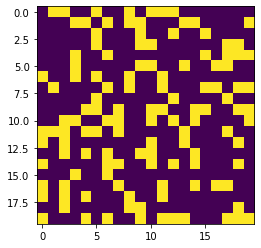

In [57]:
plt.imshow(x.reshape(20,20))

In [58]:
x.sum()

123

In [77]:
metric = 'cosine'
method = 'tsne'
n_neighbors = 30
min_dist = 0.1
bitsinfo = molmap.feature.fingerprint.Extraction().bitsinfo
bitsinfo.Subtypes.unique()

array(['MorganFP', 'RDkitFP', 'AtomPairFP', 'TorsionFP', 'AvalonFP',
       'EstateFP', 'MACCSFP', 'PharmacoErGFP', 'PharmacoPFP', 'PubChemFP',
       'MHFP6', 'MAP4'], dtype=object)

In [78]:
flist = bitsinfo[bitsinfo.Subtypes.isin(["MAP4"])].IDs.tolist()
mp2 = molmap.MolMap(ftype = 'fingerprint', metric = metric, flist =flist,)
flist = mp2.scale_info['var'].sort_values().index.tolist()

In [79]:
mp2 = molmap.MolMap(ftype = 'fingerprint', metric = metric, flist =flist,)
mp2.fit(method = method, n_neighbors = n_neighbors, min_dist = min_dist) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2048 samples in 0.003s...
[t-SNE] Computed neighbors for 2048 samples in 0.060s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2048
[t-SNE] Computed conditional probabilities for sample 2000 / 2048
[t-SNE] Computed conditional probabilities for sample 2048 / 2048
[t-SNE] Mean sigma: 0.173238
[t-SNE] Computed conditional probabilities in 0.090s
[t-SNE] Iteration 50: error = 159.7397156, gradient norm = 0.2020307 (50 iterations in 0.477s)
[t-SNE] Iteration 100: error = 179.1605988, gradient norm = 0.1579106 (50 iterations in 0.577s)
[t-SNE] Iteration 150: error = 177.7334137, gradient norm = 0.1595853 (50 iterations in 0.332s)
[t-SNE] Iteration 200: error = 170.3286438, gradient norm = 0.2017922 (50 iterations in 0.311s)
[t-SNE] Iteration 250: error = 168.0076141, gradient norm = 0.1823181 (50 iterations in 0.313s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 168.007614
[t-SNE] Iteration 300

In [80]:
mp2.plot_scatter()

2020-09-06 12:53:17,461 - INFO - [bidd-molmap] - generate file: ./fingerprint_2048_cosine_tsne_scatter
2020-09-06 12:53:17,509 - INFO - [bidd-molmap] - save html file to ./fingerprint_2048_cosine_tsne_scatter


In [84]:
from molmap.model import RegressionEstimator, MultiClassEstimator, MultiLabelEstimator
from molmap import loadmap, dataset,feature
from molmap.show import imshow_wrap
from chembench import load_data

from sklearn.utils import shuffle 
from joblib import load, dump
import numpy as np
import pandas as pd
import os

bitsinfo = feature.fingerprint.Extraction().bitsinfo
fp_types = bitsinfo.Subtypes.unique()

esol = dataset.load_ESOL(True)
lipop = dataset.load_Lipop(True)
#malaria = dataset.load_malaria(True)


total samples: 1128
total samples: 4200


In [86]:

data = esol #malaria

task_name = data.task_name
task_type = data.task_type
_, induces = load_data(task_name)
smiles = data.x
Y = data.y


#X2 = mp.batch_transform(E.batch_transform(smiles), n_jobs = 16)

X2 = mp2.batch_transform(smiles, n_jobs = 16)


Regression_res = []
for i, idx in enumerate(induces):
    train_idx, valid_idx, test_idx = idx

    X = X2[train_idx]
    y = Y[train_idx]

    X_valid = X2[valid_idx]
    y_valid = Y[valid_idx]

    X_test = X2[test_idx]
    y_test = Y[test_idx]          

    fmap_shape1 = X.shape[1:]
    n_outputs = Y.shape[1]

    clf = RegressionEstimator(n_outputs=n_outputs,  conv1_kernel_size = 11,
                              fmap_shape1 = fmap_shape1, 
                              dense_layers = [128, 64],
                              gpuid = 3,
                             ) 

    clf.fit(X, y, X_valid, y_valid)

    train_rmses, train_r2s = clf._performance.evaluate(X,y)
    valid_rmses, valid_r2s = clf._performance.evaluate(X_valid,y_valid)            
    test_rmses, test_r2s = clf._performance.evaluate(X_test,y_test)


    final_res = {'task_name':task_name, 
                 'repeat_id':i,
                 'train_rmse':np.nanmean(train_rmses), 
                 'valid_rmse':np.nanmean(valid_rmses),                      
                 'test_rmse':np.nanmean(test_rmses),

                 'train_r2':np.nanmean(train_r2s), 
                 'valid_r2':np.nanmean(valid_r2s),                      
                 'test_r2':np.nanmean(test_r2s),                        
                }

    Regression_res.append(final_res)


  0%|          | 0/1128 [00:00<?, ?it/s]

loading dataset: ESOL number of split times: 3


 84%|########4 | 951/1128 [00:03<00:00, 182.03it/s]

error when calculating C


100%|##########| 1128/1128 [00:05<00:00, 207.28it/s]


RegressionEstimator(gpuid='3')
epoch: 0001, loss: 12.3393 - val_loss: 10.7823; rmse: 3.0940 - rmse_val: 3.2836;  r2: 0.2074 - r2_val: 0.1556                                                                                                    
epoch: 0002, loss: 8.3557 - val_loss: 7.3857; rmse: 2.4956 - rmse_val: 2.7177;  r2: 0.2073 - r2_val: 0.1540                                                                                                    
epoch: 0003, loss: 5.1078 - val_loss: 4.5783; rmse: 1.9061 - rmse_val: 2.1397;  r2: 0.2060 - r2_val: 0.1514                                                                                                    
epoch: 0004, loss: 3.6904 - val_loss: 4.6412; rmse: 1.9948 - rmse_val: 2.1543;  r2: 0.2062 - r2_val: 0.1512                                                                                                    
epoch: 0005, loss: 3.8144 - val_loss: 4.3266; rmse: 1.8713 - rmse_val: 2.0800;  r2: 0.2085 - r2_val: 0.1535                            

In [87]:
pd.DataFrame(Regression_res)['test_r2'].mean()

0.6066820425492465

In [38]:
pd.DataFrame(Regression_res)['test_r2'].mean()

0.6892917379198978

In [31]:
pd.DataFrame(Regression_res)['test_r2'].mean()

0.6687799024170524